# COSMOGRAIL: The COSmological MOnitoring of GRavitational Lenses
## XIII. Time delays and 9-yr optical monitoring of the lensed quasar RX J1131-1231

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from astropy.io import fits

%matplotlib inline

In [16]:
# last updated January 9, 2021
fit_name = "fig4.dat"
fit_path = os.path.join("../data", fit_name)
if not os.path.exists(fit_path):
    !curl -O "http://cdsarc.u-strasbg.fr/viz-bin/nph-Cat/fits?J/A+A/556/A22/fig4.dat"
    !mv "fig4.dat" "../data/"
fit = fits.open(fit_path)
data = pd.DataFrame(fit[1].data, columns=fit[1].data.names)

In [21]:
fit[0].header

SIMPLE  =                    T / Standard FITS Format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    0 / No Image --- just extension(s)                 
EXTEND  =                    T / There are standard extensions                  
ORIGIN  = 'CDS     '           / File generated at CDS, Strasbourg, France      
                                 (tofits, Version 3.4)                          
             e-mail:    question@simbad.u-strasbg.fr                            
COMMENT  ARG='-m -1 /ftp/cats/J/A+A/556/A22/./fig4.dat'                         
LONGSTRN= 'OGIP 1.0'           / Long string convention (&/CONTINUE) may be used
DATE    = '2021-01-09'         / Written on 2021-01-09:18:18:18 (GMT)           
                             by: www-data@cdsarc.u-strasbg.fr                   
CDS-CAT = 'J/A+A/556/A22'      / Catalogue designation in CDS nomenclature      
COMMENT  R-band light curves

In [22]:
fit[1].header

XTENSION= 'TABLE   '           / Ascii Table Extension                          
BITPIX  =                    8 / Character data                                 
NAXIS   =                    2 / Simple 2-D matrix                              
NAXIS1  =                   86 / Number of bytes per record                     
NAXIS2  =                  707 / Number of records                              
PCOUNT  =                    0 / Get rid of random parameters                   
GCOUNT  =                    1 / Only one group (isn't it obvious?)             
TFIELDS =                   10 / Number of data fields (columns)                
EXTNAME = 'fig4.dat'           / R-band light curves of RX J1131-1231           
TBCOL1  =                    1 / ============== Start column +0                 
TUNIT1  = 'd       '           / Unit: day                                      
TFORM1  = 'F13.5   '           / Fortran Format                                 
TDISP1  = 'F13.5   '        

In [26]:
HJD_const = 2400000.5
data["HJD_rel"] = data["HJD"] - HJD_const # Relative Heliocentric Julian Day
data["HJD_rel"] = data["HJD_rel"].astype(int)
data.head()

,HJD,Amag,e_Amag,Bmag,e_Bmag,Cmag,e_Cmag,Dmag,e_Dmag,Tel,HJD_rel
0,2.452989e+06,1.81327,0.00710,1.75388,0.00777,2.86484,0.00933,4.21841,0.03145,SMARTS,52988
1,2.452996e+06,1.84318,0.00473,1.78470,0.00466,2.88121,0.00723,4.22152,0.02184,SMARTS,52995
2,2.453003e+06,1.85055,0.00705,1.81482,0.00379,2.91571,0.00932,4.19355,0.01647,SMARTS,53002
3,2.453014e+06,1.86956,0.00483,1.89740,0.00489,2.96731,0.01482,4.35638,0.04443,SMARTS,53013
4,2.453022e+06,1.89660,0.00581,1.89317,0.00581,2.90003,0.02114,4.21118,0.02205,SMARTS,53021


Text(0.5, 0, 'HJD - 2400000.5 [days]')

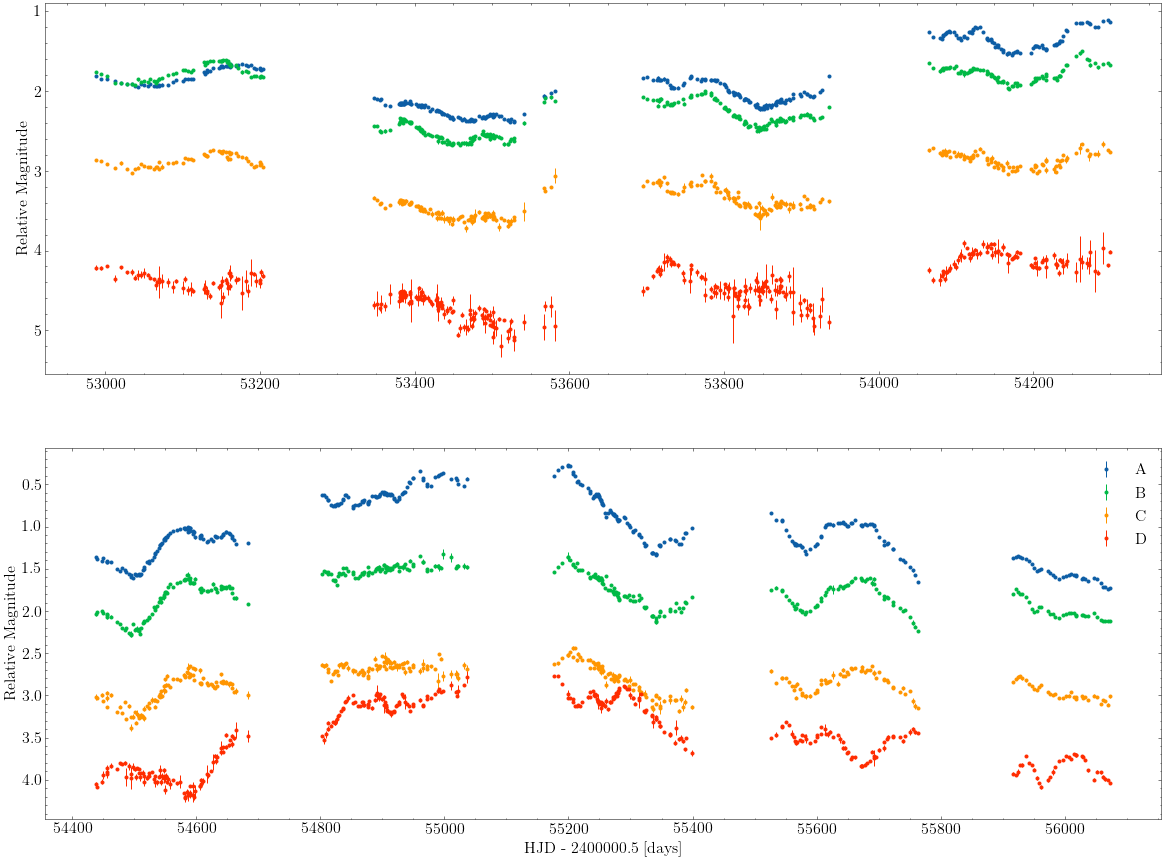

In [50]:
# Reproduction of Fig 4
plt.style.use("science") # requires the package SciencePlot installed
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

ax1_xlim = 54400
x = data["HJD_rel"]
y_columns = ["A", "B", "C", "D"]
for y_col in y_columns:
    ax1.errorbar(x[x < ax1_xlim], data[y_col+"mag"][x < ax1_xlim], yerr=data["e_" + y_col+"mag"][x < ax1_xlim], fmt=".", label=y_col)
    ax2.errorbar(x[x > ax1_xlim], data[y_col+"mag"][x > ax1_xlim], yerr=data["e_" + y_col+"mag"][x > ax1_xlim], fmt=".", label=y_col)

ax1.invert_yaxis()
ax2.invert_yaxis()
ax2.legend(loc="upper right")
ax1.set_ylabel("Relative Magnitude")
ax2.set_ylabel("Relative Magnitude")
ax2.set_xlabel(f"HJD - {HJD_const} [days]")